In [286]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
# I got the im2col_sliding_strided method online, it is not mine. 
# It is simply an implementation of the im2col method in matlab
def im2col_sliding_strided(A, BSZ, stepsize=1):
    # Parameters
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-BSZ[0]+1
    ncols = n-BSZ[1]+1
    shp = BSZ[0],BSZ[1],nrows,ncols
    strd = s0,s1,s0,s1
    
    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(BSZ[0]*BSZ[1],-1)[:,::stepsize]

In [287]:
left = Image.open('left.jpg').convert('L')
right = Image.open('right.jpg').convert('L')
right_arr = np.array(left,dtype=float)
left_arr = np.array(right,dtype=float)
N,M = left_arr.shape
print(N,M)

336 337


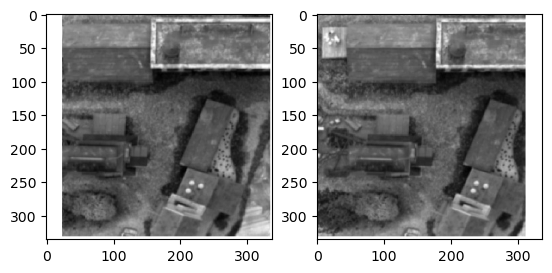

In [288]:
figs,axs = plt.subplots(1,2)
axs[0].imshow(left_arr,cmap='gray')
axs[1].imshow(right_arr,cmap='gray')
# plt.imshow(left_arr,cmap='gray')




In [289]:
size = 5
L = im2col_sliding_strided(left_arr,(size,size))
R = im2col_sliding_strided(right_arr,(size,size))
N = left_arr.shape[0]-size+1
M = left_arr.shape[1]-size+1
print(M,N)

333 332


In [290]:
for i in range(L.shape[1]):
    patch1 = L[:,i]
    patch2 = R[:,i]
    m1 = np.mean(patch1)
    m2 = np.mean(patch2)
    L[:,i] = (patch1 - m1)/(np.sqrt(np.sum(np.square(patch1-m1))))
    R[:,i] = (patch2 - m2)/(np.sqrt(np.sum(np.square(patch2-m1))))

/var/folders/vh/f7drzdf56p5gxm5_p6_y7cdw0000gn/T/ipykernel_63375/448020962.py:6: RuntimeWarning: invalid value encountered in divide
  L[:,i] = (patch1 - m1)/(np.sqrt(np.sum(np.square(patch1-m1))))


In [291]:
DSI = 1-(np.dot(L.T[:M,:],R[:,:M]))

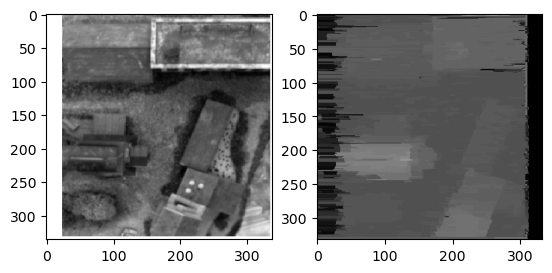

In [292]:
def stereo(L,R,occ,N,M):
  # occ = 1

  r = np.zeros((N,M))

  for row in range(1,N):
    starting = (row-1)*M
    ending = row*M

    Z =  1-(np.dot(L.T[starting:ending,:],R[:,starting:ending]))
    Z = Z.reshape(M,M)
    # x = list()
    prevs = []
    C = np.zeros((M,M))
    K = np.zeros((M,M))
    for i in range(1,M):
      C[i,0] = i*occ
    for j in range(1,M):
      C[0,j] = j*occ
    for i in range(1,M):
      for j in range(1,M):
        C[i,j] = min(C[i-1,j]+occ,C[i,j-1]+occ,C[i-1][j-1]+Z[i,j])
        if(C[i,j] == C[i-1,j-1]+Z[i,j]):
          K[i,j] = 1
        elif(C[i,j] == C[i-1,j]+occ):
          K[i,j] = 2
        else:
          K[i,j] = 3
    # plt.imshow(C,cmap='gray')
    # print(Z)
    # break
    p,q = M-1,M-1
    while(p>0 and q>0):
      # x.append((p,q))
      if(K[p,q] == 1):
        # print(p-q)
        prevs.append(np.abs(q-p))
        p = p-1
        q = q-1
      elif(K[p,q] == 2):
        p = p-1
        # prevs.append(0)
      else:
        q = q-1
        prevs.append(0)
    while len(prevs) < M:
    prevs.append(0)
    # nzeros = 0
    for i in range(1,len(prevs)):
      if(prevs[i] == 0):
        prevs[i] = prevs[i-1]
    prevs = prevs[::-1]
    
    # if(row>30 and row<40):
      # print(nzeros/len(prevs))
    # if (row==39):
    #   plt.imshow(C,cmap='gray')
    #   break
      
      # break
    # ys = [x[0] for x in x]
    # xs = [x[1] for x in x]
    # plt.gca().invert_yaxis()
    # plt.plot(xs,ys)
    # plt.imshow(Z)
    # plt.show()
    # prevs = prevs[:248]
    r[row,:] = prevs 
    # break
  return r
r = stereo(L,R,0.5,N,M)
fig,ax = plt.subplots(1,2)
ax[0].imshow(left_arr,cmap='gray')
ax[1].imshow(r,cmap='gray')

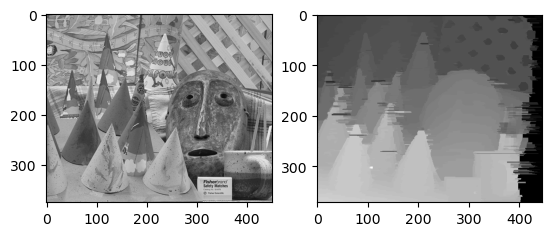

In [295]:
left = Image.open("Cones_Left.ppm").convert('L')
right = Image.open("Cones_Right.ppm").convert('L')
size = 5
left_arr = np.array(left,dtype=float)
right_arr = np.array(right,dtype=float)
L = im2col_sliding_strided(left_arr,(size,size))
R = im2col_sliding_strided(right_arr,(size,size))
N = left_arr.shape[0]-size+1
M = left_arr.shape[1]-size+1
for i in range(L.shape[1]):
    patch1 = L[:,i]
    patch2 = R[:,i]
    m1 = np.mean(patch1)
    m2 = np.mean(patch2)
    L[:,i] = (patch1 - m1)/(np.sqrt(np.sum(np.square(patch1-m1))))
    R[:,i] = (patch2 - m2)/(np.sqrt(np.sum(np.square(patch2-m1))))
r = stereo(L,R,0.5,N,M)
fig,ax = plt.subplots(1,2)
ax[0].imshow(left_arr,cmap='gray')
ax[1].imshow(r,cmap='gray')
# R = np.array(right,dtype=float)